In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from statsmodels.formula.api import logit
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold, cross_val_score
from scipy import stats
import statsmodels.formula.api as smf
import scipy
from scipy.cluster.hierarchy import dendrogram, linkage

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.linear_model import LinearRegression
import sklearn as sk

In [3]:
first_csv = pd.read_csv("test.csv")
second_csv = pd.read_csv("train.csv")

In [4]:
satisfaction = pd.concat([first_csv, second_csv])

In [5]:
satisfaction.to_csv('flight_satisfaction.csv')

In [6]:
predictors = satisfaction.iloc[:, 1:8]
predictors.reset_index()

,index,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182
...,...,...,...,...,...,...,...,...
129875,103899,94171,Female,disloyal Customer,23,Business travel,Eco,192
129876,103900,73097,Male,Loyal Customer,49,Business travel,Business,2347
129877,103901,68825,Male,disloyal Customer,30,Business travel,Business,1995
129878,103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000


In [7]:
df = pd.read_csv('cleaned.csv')
df = df.drop('Unnamed: 0', axis = 1)
df

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,satisfaction
0,19556,Female,Loyal Customer,52,Business travel,Eco,160,satisfied
1,90035,Female,Loyal Customer,36,Business travel,Business,2863,satisfied
2,12360,Male,disloyal Customer,20,Business travel,Eco,192,neutral or dissatisfied
3,77959,Male,Loyal Customer,44,Business travel,Business,3377,satisfied
4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,satisfied
...,...,...,...,...,...,...,...,...
129875,94171,Female,disloyal Customer,23,Business travel,Eco,192,neutral or dissatisfied
129876,73097,Male,Loyal Customer,49,Business travel,Business,2347,satisfied
129877,68825,Male,disloyal Customer,30,Business travel,Business,1995,neutral or dissatisfied
129878,54173,Female,disloyal Customer,22,Business travel,Eco,1000,neutral or dissatisfied


In [8]:
df.shape

(129880, 8)

In [9]:
df.describe()

,id,Age,Flight Distance
count,129880.000000,129880.000000,129880.000000
mean,64940.500000,39.427957,1190.316392
std,37493.270818,15.119360,997.452477
min,1.000000,7.000000,31.000000
25%,32470.750000,27.000000,414.000000
50%,64940.500000,40.000000,844.000000
75%,97410.250000,51.000000,1744.000000
max,129880.000000,85.000000,4983.000000


<AxesSubplot:ylabel='satisfaction'>

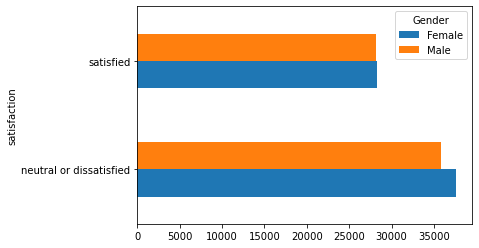

In [10]:
df.pivot_table(index = 'satisfaction', columns = ['Gender'], values = 'id', aggfunc = 'count').plot(kind = 'barh')

<AxesSubplot:ylabel='satisfaction'>

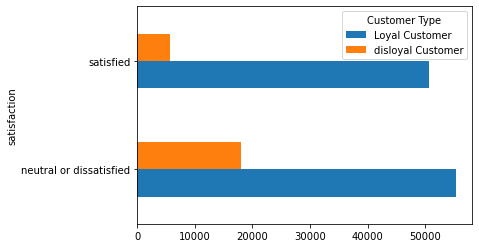

In [11]:
df.pivot_table(index = 'satisfaction', columns = ['Customer Type'], values = 'id', aggfunc = 'count').plot(kind = 'barh')

<AxesSubplot:ylabel='satisfaction'>

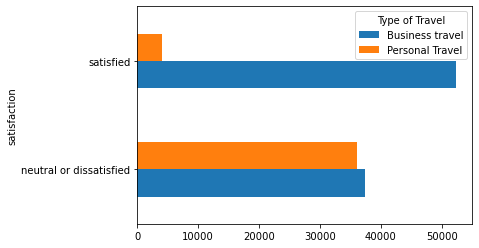

In [12]:
df.pivot_table(index = 'satisfaction', columns = ['Type of Travel'], values = 'id', aggfunc = 'count').plot(kind = 'barh')

<AxesSubplot:ylabel='satisfaction'>

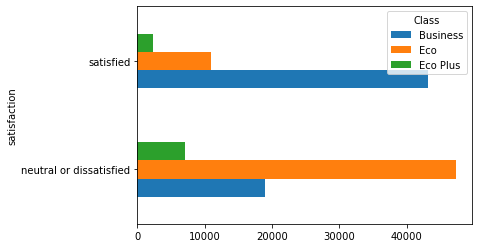

In [13]:
df.pivot_table(index = 'satisfaction', columns = ['Class'], values = 'id', aggfunc = 'count').plot(kind = 'barh')

In [14]:
new_df = df.copy()

In [15]:
def create_ordinal(df):
    """
    create_ordinal takes in diamonds and returns a dataframe of ordinal
    features with names ordinal_<col> where <col> is the original
    categorical column name.

    :Example:
    >>> diamonds = sns.load_dataset('diamonds')
    >>> out = create_ordinal(diamonds)
    >>> set(out.columns) == {'ordinal_cut', 'ordinal_clarity', 'ordinal_color'}
    True
    >>> np.unique(out['ordinal_cut']).tolist() == [0, 1, 2, 3, 4]
    True
    """
    new_df = df.copy()
    gender_unique = 'Female Male'.split(' ')
    customer_unique = 'Loyal Customer, disloyal Customer'.split(', ')
    travel_unique = 'Business travel, Personal Travel'.split(', ')
    class_unique = 'Business, Eco, Eco Plus'.split(', ')
    satisfaction_unique = 'neutral or dissatisfied, satisfied'.split(', ')
    
    
    gender_enc = {y:x for (x,y) in enumerate(gender_unique)}
    customer_enc = {y:x for (x,y) in enumerate(customer_unique)}
    travel_enc = {y:x for (x,y) in enumerate(travel_unique)}
    class_enc = {y:x for (x,y) in enumerate(class_unique)}
    satisfaction_enc = {y:x for (x,y) in enumerate(satisfaction_unique)}
    
    
    
    new_df['gender_enc'] = new_df['Gender'].replace(gender_enc)
    new_df['customer_enc'] = new_df['Customer Type'].replace(customer_enc)
    new_df['travel_enc'] =  new_df['Type of Travel'].replace(travel_enc)
    new_df['class_enc'] =  new_df['Class'].replace(class_enc)
    new_df['satisfaction_enc'] =  new_df['satisfaction'].replace(satisfaction_enc)
    return new_df[['gender_enc', 'customer_enc', 'travel_enc', 'class_enc', 'Age', 'Flight Distance', 'satisfaction_enc']]

In [313]:
ordinal_df = create_ordinal(new_df)
ordinal_df['flight_distance'] = ordinal_df['Flight Distance']
satisfaction_enc = ordinal_df['satisfaction_enc']
ordinal_df = ordinal_df.drop(['Flight Distance', 'satisfaction_enc'], axis = 1)
ordinal_df['satisfaction_enc'] = satisfaction_enc
ordinal_df

ordinal_df2 = ordinal_df.iloc[:750]
ordinal_df2

,gender_enc,customer_enc,travel_enc,class_enc,Age,flight_distance,satisfaction_enc
0,0,0,0,1,52,160,1
1,0,0,0,0,36,2863,1
2,1,1,0,1,20,192,0
3,1,0,0,0,44,3377,1
4,0,0,0,1,49,1182,1
...,...,...,...,...,...,...,...
745,1,0,0,2,18,280,0
746,0,1,0,1,20,451,1
747,0,0,0,0,80,2422,1
748,0,0,0,1,62,1076,0


In [17]:
logistic_regression = logit('satisfaction_enc ~ flight_distance', data=ordinal_df).fit()
print(logistic_regression.summary())
logistic_regression.pvalues

Optimization terminated successfully.
         Current function value: 0.639182
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:       satisfaction_enc   No. Observations:               129880
Model:                          Logit   Df Residuals:                   129878
Method:                           MLE   Df Model:                            1
Date:                Fri, 04 Jun 2021   Pseudo R-squ.:                 0.06625
Time:                        05:07:06   Log-Likelihood:                -83017.
converged:                       True   LL-Null:                       -88907.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -1.0274      0.009   -109.546      0.000      -1.046      -1.009
flight_distanc

Intercept          0.0
flight_distance    0.0
dtype: float64

In [18]:
def MSE(y, yhat):
    return np.mean(np.power(yhat - y, 2))

In [19]:
# f
mse = []
P = 6
for j in range(P):
    specific_data_column = ordinal_df[ordinal_df.columns[j]]
    model = logit(formula = 'satisfaction_enc ~ 1+ specific_data_column', data= ordinal_df)
    model = model.fit()
    yhat = model.predict()
    each_mse = MSE(ordinal_df['satisfaction_enc'], yhat)
    mse.append(each_mse)

Optimization terminated successfully.
         Current function value: 0.684469
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.666289
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.570433
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.572661
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.675478
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.639182
         Iterations 5


In [20]:
print('lowest mse: ' + ordinal_df.columns[:6][mse.index(min(mse))])
print(mse)

lowest mse: class_enc
[0.2456738263779818, 0.23720287047477412, 0.1959802918665526, 0.1883232437623116, 0.2415010122009547, 0.22356772654410825]


In [21]:
features = ordinal_df.columns
first_feature = 'class_enc'
features_without_first = [i for i in features if i != first_feature]
mse_two_features = []
for j in range(6):
    specific_data_column = ordinal_df[ordinal_df.columns[j]]
    if specific_data_column.equals(ordinal_df['class_enc']) == False:
        model = logit(formula = 'satisfaction_enc ~ 1+ class_enc + specific_data_column', data= ordinal_df)
        model = model.fit()
        yhat = model.predict()
        each_mse = MSE(ordinal_df['satisfaction_enc'], yhat)
        mse_two_features.append(each_mse)

Optimization terminated successfully.
         Current function value: 0.572634
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.556542
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.530341
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.568940
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.566649
         Iterations 6


In [22]:
print('lowest mse: ' + features_without_first[mse_two_features.index(min(mse_two_features))])
print(mse_two_features)

lowest mse: travel_enc
[0.1883146589303074, 0.18172148846324138, 0.17530730973408085, 0.1869915372681581, 0.1864206701515766]


In [23]:
features = ordinal_df.columns
first_feature = 'class_enc'
second_feature = 'travel_enc'
features_without_first_second = [i for i in features if (i != first_feature) and (i != second_feature)]
mse_three_features = []
for j in range(6):
    specific_data_column = ordinal_df[ordinal_df.columns[j]]
    if (specific_data_column.equals(ordinal_df['class_enc']) == False) and (specific_data_column.equals(ordinal_df['travel_enc']) == False):
        model = logit(formula = 'satisfaction_enc ~ 1+ class_enc + travel_enc + specific_data_column', data= ordinal_df)
        model = model.fit()
        yhat = model.predict()
        each_mse = MSE(ordinal_df['satisfaction_enc'], yhat)
        mse_three_features.append(each_mse)

Optimization terminated successfully.
         Current function value: 0.530268
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.487273
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.525198
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.525840
         Iterations 6


In [24]:
print('lowest mse: ' + features_without_first_second[mse_three_features.index(min(mse_three_features))])
print(mse_three_features)

lowest mse: customer_enc
[0.17527507304264364, 0.1571546183896394, 0.17270243895079904, 0.1736303026579443]


In [25]:
features = ordinal_df.columns
first_feature = 'class_enc'
second_feature = 'travel_enc'
third_feature = 'customer_enc'
features_without_three = [i for i in features if (i != first_feature) and (i != second_feature) and (i != third_feature)]
mse_four_features = []
for j in range(6):
    specific_data_column = ordinal_df[ordinal_df.columns[j]]
    if (specific_data_column.equals(ordinal_df['class_enc']) == False) and (specific_data_column.equals(ordinal_df['travel_enc']) == False) \
        and (specific_data_column.equals(ordinal_df['customer_enc']) == False):
        model = logit(formula = 'satisfaction_enc ~ 1+ class_enc + travel_enc + customer_enc + specific_data_column', data= ordinal_df)
        model = model.fit()
        yhat = model.predict()
        each_mse = MSE(ordinal_df['satisfaction_enc'], yhat)
        mse_four_features.append(each_mse)

Optimization terminated successfully.
         Current function value: 0.487261
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.487270
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.487227
         Iterations 6


In [26]:
print('lowest mse: ' + features_without_three[mse_four_features.index(min(mse_four_features))])
print(mse_four_features)

lowest mse: flight_distance
[0.1571501822837749, 0.15714915301096044, 0.15714829802719765]


In [27]:
features = ordinal_df.columns
first_feature = 'class_enc'
second_feature = 'travel_enc'
third_feature = 'customer_enc'
four_feature = 'flight_distance'
features_without_four = [i for i in features if (i != first_feature) and (i != second_feature) and (i != third_feature) and (i != four_feature)]
mse_five_features = []
for j in range(6):
    specific_data_column = ordinal_df[ordinal_df.columns[j]]
    if (specific_data_column.equals(ordinal_df['class_enc']) == False) and (specific_data_column.equals(ordinal_df['travel_enc']) == False) \
        and (specific_data_column.equals(ordinal_df['customer_enc']) == False) and (specific_data_column.equals(ordinal_df['flight_distance']) == False):
        model = logit(formula = 'satisfaction_enc ~ 1+ class_enc + travel_enc + customer_enc + flight_distance + specific_data_column', data= ordinal_df)
        model = model.fit()
        yhat = model.predict()
        each_mse = MSE(ordinal_df['satisfaction_enc'], yhat)
        mse_five_features.append(each_mse)

Optimization terminated successfully.
         Current function value: 0.487216
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.487225
         Iterations 6


In [28]:
print('lowest mse: ' + features_without_four[mse_five_features.index(min(mse_five_features))])
print(mse_five_features)

lowest mse: gender_enc
[0.1571437911713825, 0.15714387517711406]


In [29]:
features = ordinal_df.columns
first_feature = 'class_enc'
second_feature = 'travel_enc'
third_feature = 'customer_enc'
four_feature = 'flight_distance'
five_feature = 'gender_enc'
features_without_five = [i for i in features if (i != first_feature) and (i != second_feature) and (i != third_feature) and (i != four_feature) and (i != five_feature)]
mse_six_features = []
for j in range(6):
    specific_data_column = ordinal_df[ordinal_df.columns[j]]
    if (specific_data_column.equals(ordinal_df['class_enc']) == False) and (specific_data_column.equals(ordinal_df['travel_enc']) == False) \
        and (specific_data_column.equals(ordinal_df['customer_enc']) == False) and (specific_data_column.equals(ordinal_df['flight_distance']) == False) \
        and (specific_data_column.equals(ordinal_df['gender_enc']) == False):
        model = logit(formula = 'satisfaction_enc ~ 1+ class_enc + travel_enc + customer_enc + flight_distance + gender_enc +specific_data_column', data= ordinal_df)
        model = model.fit()
        yhat = model.predict()
        each_mse = MSE(ordinal_df['satisfaction_enc'], yhat)
        mse_six_features.append(each_mse)

Optimization terminated successfully.
         Current function value: 0.487214
         Iterations 6


In [30]:
print('lowest mse: ' + features_without_five[mse_six_features.index(min(mse_six_features))])
print(mse_six_features)

lowest mse: Age
[0.15713938131157226]


In [314]:
ten_fold = sk.model_selection.KFold(n_splits = 10, shuffle = True)
intercept_test_mse = []
intercept_train_mse = []

one_p_test_mse = []
one_p_train_mse = []

two_p_test_mse = []
two_p_train_mse = []

three_p_test_mse = []
three_p_train_mse = []

four_p_test_mse = []
four_p_train_mse = []

five_p_test_mse = []
five_p_train_mse = []

six_p_test_mse = []
six_p_train_mse = []

for train_index, test_index in ten_fold.split(ordinal_df2):
    data_train, data_test = ordinal_df2.iloc[train_index], ordinal_df2.iloc[test_index]
    
    no_parameter = logit(formula = 'satisfaction_enc ~ 1', data = data_train)
    no_p_model = no_parameter.fit()
    no_p_yhat = no_p_model.predict(data_test)
    no_p_yhat_train = no_p_model.predict(data_train)
    
    no_p_mse = MSE(data_test['satisfaction_enc'], no_p_yhat)
    intercept_test_mse.append(no_p_mse)
    no_p_mse_train = MSE(data_train['satisfaction_enc'], no_p_yhat_train)
    intercept_train_mse.append(no_p_mse_train)
    
    one_parameter = logit(formula = 'satisfaction_enc ~ 1 + class_enc', data = data_train)
    one_p_model = one_parameter.fit()
    one_p_yhat = one_p_model.predict(data_test)
    one_p_yhat_train = one_p_model.predict(data_train)
    
    one_p_mse = MSE(data_test['satisfaction_enc'], one_p_yhat)
    one_p_test_mse.append(one_p_mse)
    one_p_mse_train = MSE(data_train['satisfaction_enc'], one_p_yhat_train)
    one_p_train_mse.append(one_p_mse_train)
    
    two_parameter = logit(formula = 'satisfaction_enc ~ 1 + class_enc + travel_enc', data = data_train)
    two_p_model = two_parameter.fit()
    two_p_yhat = two_p_model.predict(data_test)
    two_p_yhat_train = two_p_model.predict(data_train)
    
    two_p_mse = MSE(data_test['satisfaction_enc'], two_p_yhat)
    two_p_test_mse.append(two_p_mse)
    two_p_mse_train = MSE(data_train['satisfaction_enc'], two_p_yhat_train)
    two_p_train_mse.append(two_p_mse_train)
    
    three_parameter = logit(formula = 'satisfaction_enc ~ 1 + class_enc + travel_enc + customer_enc', data = data_train)
    three_p_model = three_parameter.fit()
    three_p_yhat = three_p_model.predict(data_test)
    three_p_yhat_train = three_p_model.predict(data_train)

    
    three_p_mse = MSE(data_test['satisfaction_enc'], three_p_yhat)
    three_p_test_mse.append(three_p_mse)
    three_p_mse_train = MSE(data_train['satisfaction_enc'], three_p_yhat_train)
    three_p_train_mse.append(three_p_mse_train)
    
    four_parameter = logit(formula = 'satisfaction_enc ~ 1 + class_enc + travel_enc + customer_enc + flight_distance', data = data_train)
    four_p_model = four_parameter.fit()
    four_p_yhat = four_p_model.predict(data_test)
    four_p_yhat_train = four_p_model.predict(data_train)
    
    four_p_mse = MSE(data_test['satisfaction_enc'], four_p_yhat)
    four_p_test_mse.append(four_p_mse)
    four_p_mse_train = MSE(data_train['satisfaction_enc'], four_p_yhat_train)
    four_p_train_mse.append(four_p_mse_train)
    
    five_parameter = logit(formula = 'satisfaction_enc ~ 1 + class_enc + travel_enc + customer_enc + flight_distance + gender_enc', data = data_train)
    five_p_model = five_parameter.fit()
    five_p_yhat = five_p_model.predict(data_test)
    five_p_yhat_train = five_p_model.predict(data_train)
    
    five_p_mse = MSE(data_test['satisfaction_enc'], five_p_yhat)
    five_p_test_mse.append(five_p_mse)
    five_p_mse_train = MSE(data_train['satisfaction_enc'], five_p_yhat_train)
    five_p_train_mse.append(five_p_mse_train)
    
    six_parameter = logit(formula = 'satisfaction_enc ~ 1 + class_enc + travel_enc + customer_enc + flight_distance + gender_enc + Age', data = data_train)
    six_p_model = six_parameter.fit()
    six_p_yhat = six_p_model.predict(data_test)
    six_p_yhat_train = six_p_model.predict(data_train)
    
    six_p_mse = MSE(data_test['satisfaction_enc'], six_p_yhat)
    six_p_test_mse.append(six_p_mse)
    six_p_mse_train = MSE(data_train['satisfaction_enc'], six_p_yhat_train)
    six_p_train_mse.append(six_p_mse_train)

Optimization terminated successfully.
         Current function value: 0.691301
         Iterations 3
Optimization terminated successfully.
         Current function value: 0.578891
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.514964
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.467116
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.465336
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.465131
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.464028
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.691802
         Iterations 3
Optimization terminated successfully.
         Current function value: 0.579736
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.520003
  

In [320]:
mse_for_each_test = []
mse_for_each_test.append(np.mean(one_p_test_mse))
mse_for_each_test.append(np.mean(two_p_test_mse))
mse_for_each_test.append(np.mean(three_p_test_mse))
mse_for_each_test.append(np.mean(four_p_test_mse))
mse_for_each_test.append(np.mean(five_p_test_mse))
mse_for_each_test.append(np.mean(six_p_test_mse))
mse_test_1000 = np.array(mse_for_each_test)
print(mse_test_1000)

mse_for_each_training = []
mse_for_each_training.append(np.mean(one_p_train_mse))
mse_for_each_training.append(np.mean(two_p_train_mse))
mse_for_each_training.append(np.mean(three_p_train_mse))
mse_for_each_training.append(np.mean(four_p_train_mse))
mse_for_each_training.append(np.mean(five_p_train_mse))
mse_for_each_training.append(np.mean(six_p_train_mse))
mse_train_1000 = np.array(mse_for_each_training)
print(mse_train_1000)

mse_test_1000 - mse_train_1000

[0.19230532 0.17112145 0.1501197  0.15042685 0.15090104 0.15110491]
[0.19181972 0.17054531 0.14885872 0.14867831 0.14865357 0.14824177]


array([0.00048559, 0.00057613, 0.00126098, 0.00174854, 0.00224747,
       0.00286315])

In [325]:
difference = mse_test_1000 - mse_train_1000

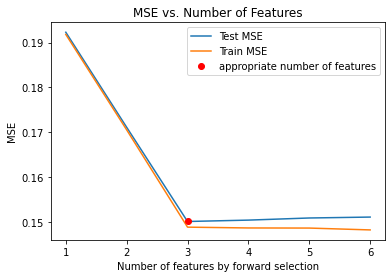

In [323]:
feature_number = [1,2,3,4,5,6]
plt.title("MSE vs. Number of Features")
plt.plot(feature_number, mse_test_1000, label = 'Test MSE')
plt.plot(feature_number, mse_train_1000, label = 'Train MSE')
plt.xlabel("Number of features by forward selection")
plt.ylabel("MSE")
plt.plot(feature_number[2], mse_test_1000[2], 'ro', label = 'appropriate number of features')
plt.legend(loc ='upper right')

Text(0, 0.5, 'Difference')

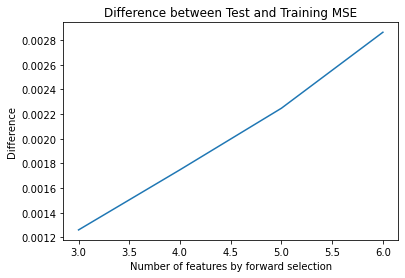

In [328]:
plt.title("Difference between Test and Training MSE")
plt.plot(feature_number[2:], difference[2:])
plt.xlabel("Number of features by forward selection")
plt.ylabel("Difference")

In [ ]:
ordinal_df2['0.76_predictions'] = 0
ordinal_df2.loc[ordinal_df2["predictions"] > 0.76, '0.76_predictions'] = 1
ordinal_df2

In [277]:
ordinal_df['0.76_predictions'] = 0
ordinal_df.loc[ordinal_df["predictions"] > 0.76, '0.76_predictions'] = 1
ordinal_df

t_p = len(ordinal_df.loc[(ordinal_df['satisfaction_enc'] == 1) & (ordinal_df['0.77_predictions'] == 1)])
f_p = len(ordinal_df.loc[(ordinal_df['satisfaction_enc'] == 0) & (ordinal_df['0.77_predictions'] == 1)])
t_n = len(ordinal_df.loc[(ordinal_df['satisfaction_enc'] == 0) & (ordinal_df['0.77_predictions'] == 0)])
f_n = len(ordinal_df.loc[(ordinal_df['satisfaction_enc'] == 1) & (ordinal_df['0.77_predictions'] == 0)])
print(t_p)
print(f_p)
print(t_n)
print(f_n)

np.sort(list(ordinal_df['predictions']))

KeyError: '0.77_predictions'

In [298]:
three_parameter = logit(formula = 'satisfaction_enc ~ 1 + class_enc + travel_enc + customer_enc', data = ordinal_df)
three_p_model = three_parameter.fit()
three_p_yhat = three_p_model.predict(ordinal_df)
ordinal_df['predictions'] = three_p_yhat
ordinal_df

threshold_df = ordinal_df.copy()
threshold_df

F1_Lst = []
precision_lst = []
recall_lst = []
threshold_lst = []
accuracy_lst = []
for i in range(0,77, 1):
    threshold = i / 100
    threshold_lst.append(threshold)
    
    threshold_df['%f_predictions' %(threshold)] = 0
    threshold_df.loc[threshold_df['predictions'] > threshold, '%f_predictions' %(threshold)] = 1
    
    t_p = len(threshold_df.loc[(threshold_df['satisfaction_enc'] == 1) & (threshold_df['%f_predictions' %(threshold)] == 1)])
    f_p = len(threshold_df.loc[(threshold_df['satisfaction_enc'] == 0) & (threshold_df['%f_predictions' %(threshold)] == 1)])
    t_n = len(threshold_df.loc[(threshold_df['satisfaction_enc'] == 0) & (threshold_df['%f_predictions' %(threshold)] == 0)])
    f_n = len(threshold_df.loc[(threshold_df['satisfaction_enc'] == 1) & (threshold_df['%f_predictions' %(threshold)] == 0)])
    
    accuracy = (t_p + t_n) / (t_p + f_p + t_n + f_n)
    accuracy_lst.append(accuracy)
    precision = t_p / (t_p + f_p)
    recall = t_p / (t_p + f_n)
    F1 = (precision * recall) / (precision + recall) * 2
    precision_lst.append(precision)
    recall_lst.append(recall)
    F1_Lst.append(F1)

Optimization terminated successfully.
         Current function value: 0.487273
         Iterations 6


In [299]:
np.sort(list(ordinal_df['predictions']))

array([0.00715166, 0.00715166, 0.00715166, ..., 0.76810643, 0.76810643,
       0.76810643])

0.7796256141956275


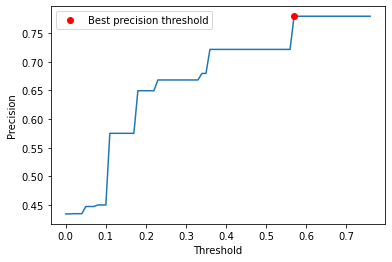

In [318]:
plt.plot(threshold_lst, precision_lst)
plt.xlabel("Threshold")
plt.ylabel("Precision")
plt.plot(threshold_lst[threshold_lst.index(0.57)], precision_lst[threshold_lst.index(0.57)], 'ro', label = 'Best precision threshold')
plt.legend(loc='upper left')

print(precision_lst[threshold_lst.index(0.57)])

0.694531083859077


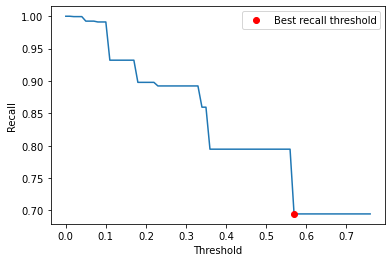

In [319]:
plt.plot(threshold_lst, recall_lst)
plt.xlabel("Threshold")
plt.ylabel("Recall")
plt.plot(threshold_lst[threshold_lst.index(0.57)], recall_lst[threshold_lst.index(0.57)], 'ro', label = 'Best recall threshold')
plt.legend(loc='upper right')
print(recall_lst[threshold_lst.index(0.57)])

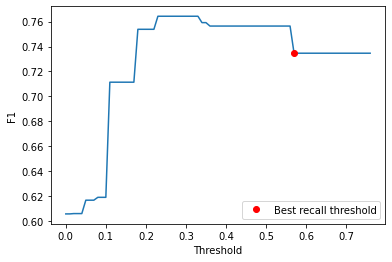

In [306]:
plt.plot(threshold_lst, F1_Lst)
plt.xlabel("Threshold")
plt.ylabel("F1")
plt.plot(threshold_lst[threshold_lst.index(0.57)], F1_Lst[threshold_lst.index(0.57)], 'ro', label = 'Best recall threshold')
plt.legend(loc='lower right')

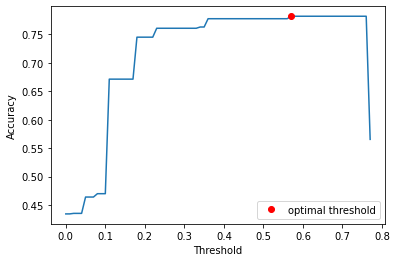

In [279]:
plt.plot(threshold_lst, accuracy_lst)
plt.xlabel("Threshold")
plt.ylabel("Accuracy")
plt.plot(threshold_lst[accuracy_lst.index(max(accuracy_lst))], accuracy_lst[accuracy_lst.index(max(accuracy_lst))], 'ro', label = 'optimal threshold')
plt.legend()

In [317]:
print(accuracy_lst[accuracy_lst.index(max(accuracy_lst))])
print(threshold_lst[accuracy_lst.index(max(accuracy_lst)) ])

0.7819910686787804
0.57
